# Testing the sparsity of the Schwinger Hamiltonian

In [1]:
import sys
sys.path.append('/home/iiyama/src/qt4hep')
import numpy as np
import scipy
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp

from qt4hep.staggered_fermion import *
from qt4hep.spo import *
from qt4hep.dense import *

In [2]:
mass = 1.
lsp = 0.5
coupling_j = 0.2

In [3]:
def sparse_data(mat):
    spmat = scipy.sparse.coo_array(mat)
    rows, cols = spmat.coords
    data = []
    for row, col, val in zip(rows, cols, spmat.data):
        if np.isclose(val.imag, 0.):
            val = val.real
        if np.isclose(val.real, 0.):
            val = val.imag
        data.append((int(row), int(col), f'{val:.3f}'))
    return data

## Position-space basis

In [4]:
nsites = np.arange(2, 26, 2)
nnzs = []
for num_sites in nsites:
    spmat = schwinger_hamiltonian_spo(num_sites, lsp, mass, coupling_j).to_matrix(sparse=True)
    nnzs.append(spmat.nnz)
nnzs = np.array(nnzs)

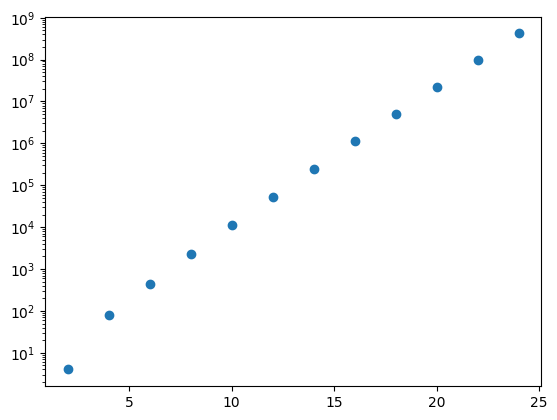

In [6]:
plt.scatter(nsites, nnzs)
plt.yscale('log')

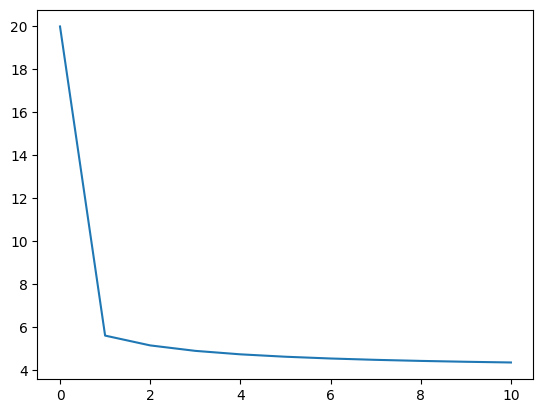

In [7]:
plt.plot(nnzs[1:] / nnzs[:-1])

In [8]:
nnzs[-1]

419430400

## Spectrum

In [7]:
num_sites = 4
hmat = schwinger_hamiltonian_spo(num_sites, lsp, mass, 0.).to_matrix()
eigvals, eigvecs = np.linalg.eigh(hmat)
eigvals = cleaned(eigvals)
eigvecs = cleaned(eigvecs)
for ilevel in range(2 ** num_sites):
    state = eigvecs[:, ilevel]
    state /= np.sqrt(np.sum(np.square(np.abs(state))))
    indices = np.nonzero(state)[0]
    terms = []
    for idx in indices:
        binary = (np.array(idx) >> np.arange(num_sites)[::-1]) % 2
        coeff = state[idx].real if np.isclose(state[idx].imag, 0.) else state[idx]
        terms.append((coeff, ''.join(f'{b}' for b in binary)))
    print(ilevel, ' + '.join(f'{term[0]:.3f}|{term[1]})' for term in terms))

0 -0.263|0011) + 0.263|0110) + 0.263|1001) + -0.851|1010) + 0.263|1100)
1 0.372|0001) + -0.602|0010) + 0.372|0100) + -0.602|1000)
2 -0.372|0111) + 0.602|1011) + -0.372|1101) + 0.602|1110)
3 -0.425|0011) + 0.526|0101) + -0.425|0110) + -0.425|1001) + 0.425|1100)
4 -0.707|0010) + 0.707|1000)
5 0.707|1011) + -0.707|1110)
6 -0.703|0011) + 0.075|0110) + -0.075|1001) + -0.703|1100)
7 0.075|0011) + 0.703|0110) + -0.703|1001) + 0.075|1100)
8 1.000|0000)
9 1.000|1111)
10 0.707|0111) + -0.707|1101)
11 0.707|0001) + -0.707|0100)
12 -0.425|0011) + 0.425|0110) + 0.425|1001) + 0.526|1010) + 0.425|1100)
13 0.602|0001) + 0.372|0010) + 0.602|0100) + 0.372|1000)
14 0.602|0111) + 0.372|1011) + 0.602|1101) + 0.372|1110)
15 -0.263|0011) + -0.851|0101) + -0.263|0110) + -0.263|1001) + 0.263|1100)
